# Lab Session \# 01 


---


by Josué Obregón <br>
BDA714-00 - Data Mining <br>
Department of Big Data Analytics - Kyung Hee University<br>


## Objective

The objective of this lab session is to familiarize the student with some of the different technologies tools that we will use throughout the course: GitHub, Google colab and the scikit-learn library.

## Importing libraries and loading the data to a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


The libraries we'll import to start with, are pandas for handling the data and matplotlib for some plotting.

Data were obtained from a study of image segmentation quality for SK-BR-3 cells. [Link to article with data details](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-8-340#Sec22) -- [Link to data](https://static-content.springer.com/esm/art%3A10.1186%2F1471-2105-8-340/MediaObjects/12859_2006_1712_MOESM1_ESM.csv)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!mkdir data

In [3]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1iaPYDUAJ8rCApeYfQplMbzeLPPUyQJ8f'
output = 'data/screening_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iaPYDUAJ8rCApeYfQplMbzeLPPUyQJ8f
To: /content/data/screening_data.csv
100%|██████████| 2.06M/2.06M [00:00<00:00, 69.7MB/s]


'data/screening_data.csv'

In [4]:
df = pd.read_csv('data/screening_data.csv')

In [5]:
df.head(5)

,Unnamed: 0,Case,Class,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AngleStatusCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AreaStatusCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh2,MorphologyV2Cell.AvgIntenCh3,...,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.VarIntenStatusCh1,MorphologyV2Cell.VarIntenStatusCh3,MorphologyV2Cell.VarIntenStatusCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.WidthStatusCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


## Selection of columns to work with and generation of a scatter plot

In this example we will work with two specific predictor columns. It is not necessary to know the context about what these mean, so we will rename them to *PredictorA* and *PredictorB*.

The *Class* column indicates to which class each record belongs (poorly segmented *PS* or well-segmented *WS*). From here we see that the output variable of our work is a category, therefore the supervised learning task in Machine Learning is **classification**.

The *Case* column indicates whether the record was used for training or testing (e.g., *Train* or *Test*). With this information we can partition our data set. We can also choose to split the dataset randomly, but if we want to create repeatable results, the split of the dataset must be the same between different repetitions of the same experiment. This is quite common in academia where the results of experiments can be verified by other researchers.

Based on this information, we can make a scatter plot to see the relationship of these predictors.

<blockquote> 
We must take into account that when performing EDA (Exploratory Data Analysis), we only use the training data to avoid any data leakage.( <a href="https://en.wikipedia.org/wiki/Leakage_%28machine_learning%29#Training_example_leakage">Training example leakage</a>).
</blockquote>

In [6]:
columns = ['MorphologyV2Cell.EqSphereAreaCh1', 'MorphologyV2Cell.PerimCh1', 'Class', 'Case']
new_names = ['PredictorA','PredictorB', 'Class', 'Case']

In [7]:
df = df[columns]
df.columns = new_names

In [8]:
df.head()

,PredictorA,PredictorB,Class,Case
0,742.115646,68.783380,PS,Test
1,3278.725624,154.898761,PS,Train
2,1727.410431,84.564598,WS,Train
3,1194.931973,101.091070,PS,Train
4,1140.426304,86.466698,PS,Test


In [9]:
color_dict = {'PS':'cornflowerblue', 'WS':'darkorange'}
df['color']= df['Class'].map(color_dict)

In [10]:
df.head()

,PredictorA,PredictorB,Class,Case,color
0,742.115646,68.783380,PS,Test,cornflowerblue
1,3278.725624,154.898761,PS,Train,cornflowerblue
2,1727.410431,84.564598,WS,Train,darkorange
3,1194.931973,101.091070,PS,Train,cornflowerblue
4,1140.426304,86.466698,PS,Test,cornflowerblue


In [11]:
train = df[df['Case']=='Train']
test = df[df['Case']=='Test']

In [12]:
train.head()

,PredictorA,PredictorB,Class,Case,color
1,3278.725624,154.898761,PS,Train,cornflowerblue
2,1727.410431,84.564598,WS,Train,darkorange
3,1194.931973,101.091070,PS,Train,cornflowerblue
11,1027.222222,68.710620,WS,Train,darkorange
14,1035.607710,73.405592,PS,Train,cornflowerblue


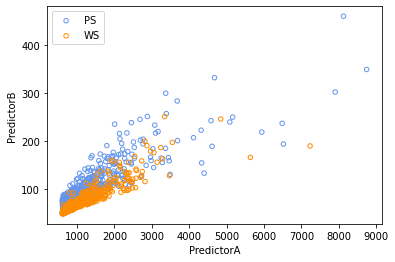

In [13]:
fig, ax = plt.subplots()
for class_ in pd.unique(df['Class']):
  train[train['Class']==class_].plot.scatter('PredictorA','PredictorB', c='none', edgecolor=color_dict[class_],label=class_, ax=ax)

## Training a predictive model

The next step is to train a predictive data model. We are going to use a simple model, a logistic regression.



1. We import the necessary functions from the [scikit_lern](https://scikit-learn.org/stable/) library (v1.0.2 at the time of doing this tutorial).
2. We create our training variables, dividing the dataset into predictor variables (usually represented by $X$) *X_train*, and target variable (usually represented by $y$) *y_train*, we do the same for the test data, this is *X_test* and *y_test*
3. We train the model by calling the *fit* function.
4. We generate the ROC graph ([Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)) and calculate the area under the curve.
5. We analyze


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
X_train = train[['PredictorA','PredictorB']]
y_train = train['Class']

X_test = test[['PredictorA','PredictorB']]
y_test = test['Class']

In [16]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [17]:
clf.predict(X_test)[0:5].tolist()

['PS', 'PS', 'WS', 'WS', 'PS']

In [18]:
y_test[0:5]

0    PS
4    PS
5    WS
6    WS
7    PS
Name: Class, dtype: object

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


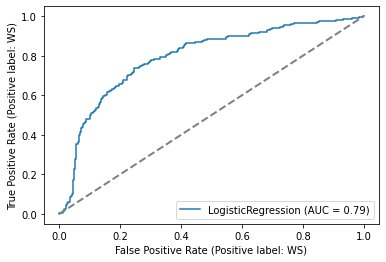

In [19]:
roc_curve = metrics.plot_roc_curve(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')